In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Load the Breast Cancer dataset
df = pd.read_csv('Breast_cancer_dataset.csv')
# Display the first few rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

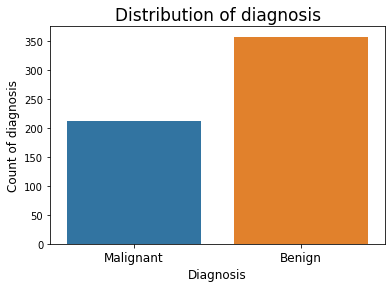

In [ ]:
# Distribution of the target variable
sns.countplot(x="diagnosis",data=df)
plt.title("Distribution of diagnosis",fontsize=17,c="k")
plt.xlabel("Diagnosis",fontsize=12)
plt.ylabel("Count of diagnosis",fontsize=12)
plt.xticks([0, 1], ['Malignant', 'Benign'], fontsize=12)
plt.show()

In [ ]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# Remove unwanted columns from the dataset
df=df.drop(["Unnamed: 32", "id"],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


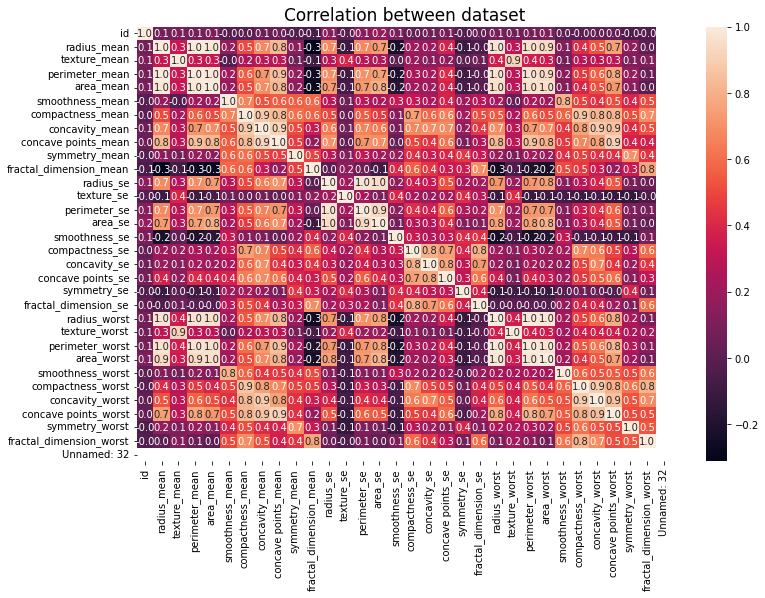

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,8))
c=df.corr(numeric_only=True)
sns.heatmap(c,annot=True,fmt=".1f")
plt.title("Correlation between dataset",fontsize=17,c="k")
plt.show()

In [ ]:
# Transform diagnosis column into numeric
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
df["diagnosis"]=Encoder.fit_transform(df["diagnosis"])
df["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
## Split data into feature(x) and target(y)
x = df.drop("diagnosis",axis=1)
y = df["diagnosis"]

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=10000, random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [ ]:
# Predict on the training and testing set
y_pred_train_log_reg = pipeline.predict(x_train)
y_pred_test_log_reg = pipeline.predict(x_test)

# Predict probabilities on the testing set
y_pred_test_prob_log_reg = pipeline.predict_proba(x_test)[:, 1]

In [ ]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_log_reg,
    'Predicted Probability': y_pred_test_prob_log_reg
})

# Display the first 5 instances in the result dataframe
results_df.head()

,Actual Label,Predicted Label,Predicted Probability
204,0,0,0.113590
70,1,1,0.999991
131,1,1,0.996921
431,0,0,0.000510
540,0,0,0.000061


In [ ]:
# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_log_reg)
testing_accuracy = accuracy_score(y_test, y_pred_test_log_reg)

print("Logistic Regression")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Logistic Regression
Training Accuracy: 0.9868131868131869
Testing Accuracy: 0.9736842105263158


Confusion Matrix:
[[70  1]
 [ 2 41]]


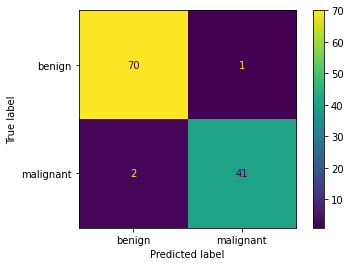

In [ ]:
# Print confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred_test_log_reg)
print("Confusion Matrix:")
print(conf_matrix)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["benign", "malignant"])

# display matrix
cm_display.plot()
plt.show()


In [ ]:
# Print classification report
print("\t\tLogistic Regression Classification Report:")
print("\t\t-----------------------------------------")
print(classification_report(y_test, y_pred_test_log_reg))

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# import the resources for roc curve
from sklearn.metrics import roc_curve, auc


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob_log_reg)

In [ ]:
print(fpr)##8 items

[0.         0.         0.         0.01408451 0.01408451 0.09859155
 0.09859155 1.        ]


In [ ]:
print(tpr)##8 otems in the output

[0.         0.02325581 0.95348837 0.95348837 0.97674419 0.97674419
 1.         1.        ]


In [ ]:
print(thresholds)##8

[           inf 1.00000000e+00 7.76680319e-01 5.42699821e-01
 4.84826685e-01 1.13099081e-01 8.41633901e-02 8.18375684e-07]


In [ ]:
roc_auc = auc(fpr, tpr)

In [ ]:
print(roc_auc)

0.99737962659679


In [ ]:
##99% without bias, if the prohibitve items containing bag is picked , 99% chances that it was a correct pick

Optimal Threshold: 0.4848


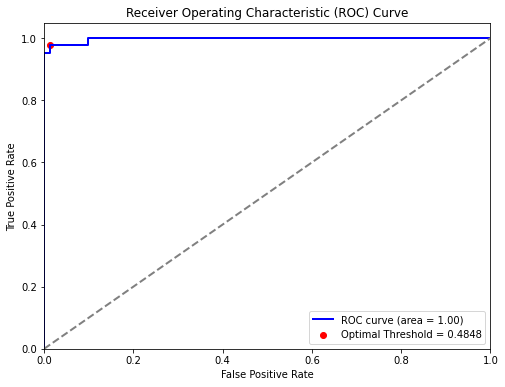

In [ ]:
# Compute Youden's J statistic for each threshold
youden_j = tpr - fpr##difference
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Plot the ROC curve with the optimal threshold marked
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(optimal_threshold)

0.48482668465556367


Support value in confusion matrix is the total number of instances in the actual dataset